In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_data = pd.read_csv("C:\\Users\\Paras Sharma\\OneDrive\\Documents\\car data.csv")

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_data.duplicated().sum()


2

In [8]:
car_data.drop_duplicates(inplace=True)

In [9]:
car_data.duplicated().sum()

0

In [10]:
categorical_columns = ['Car_Name','Fuel_Type','Selling_type','Transmission']
for col in categorical_columns:
    print(f"Category in {col} is : {car_data[col].unique()}")

Category in Car_Name is : ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenge

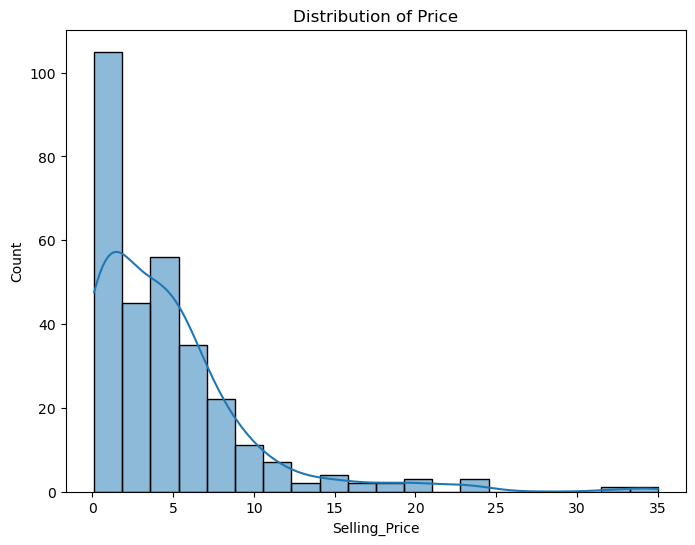

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data=car_data['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

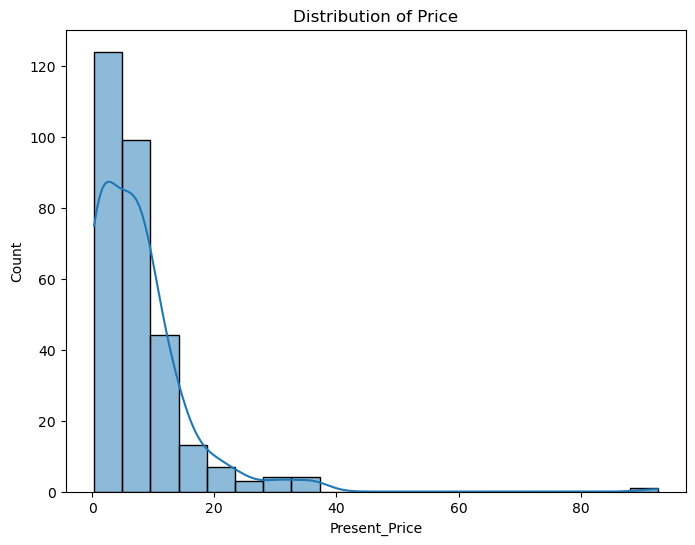

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data=car_data['Present_Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

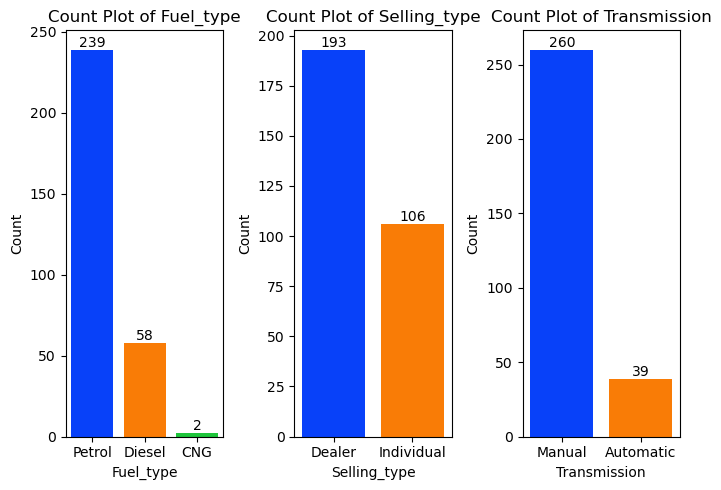

In [13]:
categorical_columns = ['Fuel_Type','Selling_type','Transmission']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7, 5))
axes = axes.ravel()  
for i, column in enumerate(categorical_columns):
    sns.countplot(x=car_data[column], data=car_data, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()


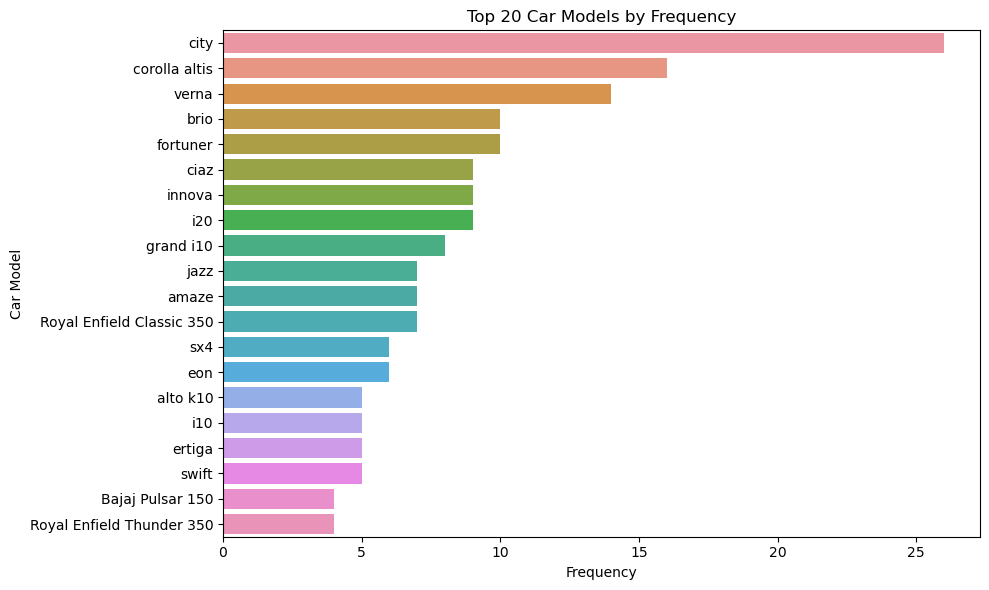

In [14]:
n = 20  # Number of top car models to plot
top_car_models = car_data['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

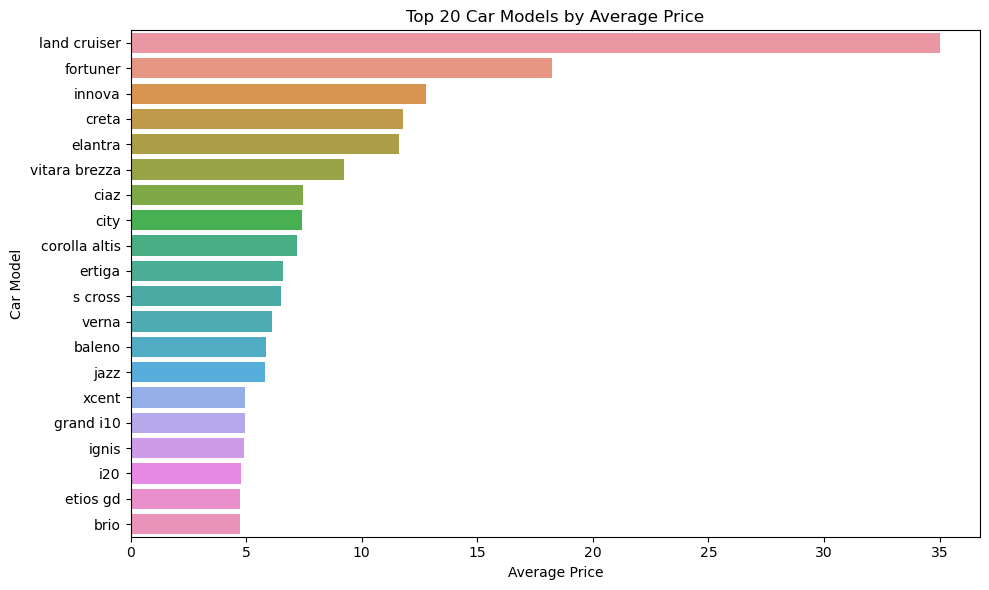

In [15]:
avg_prices_by_car = car_data.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

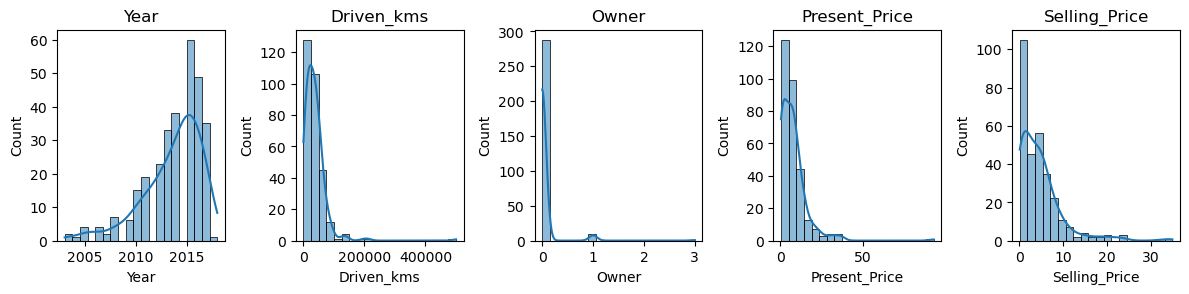

In [16]:
numerical_columns = ['Year','Driven_kms','Owner','Present_Price','Selling_Price']

plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 5, numerical_columns.index(feature) + 1)
    sns.histplot(data=car_data[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

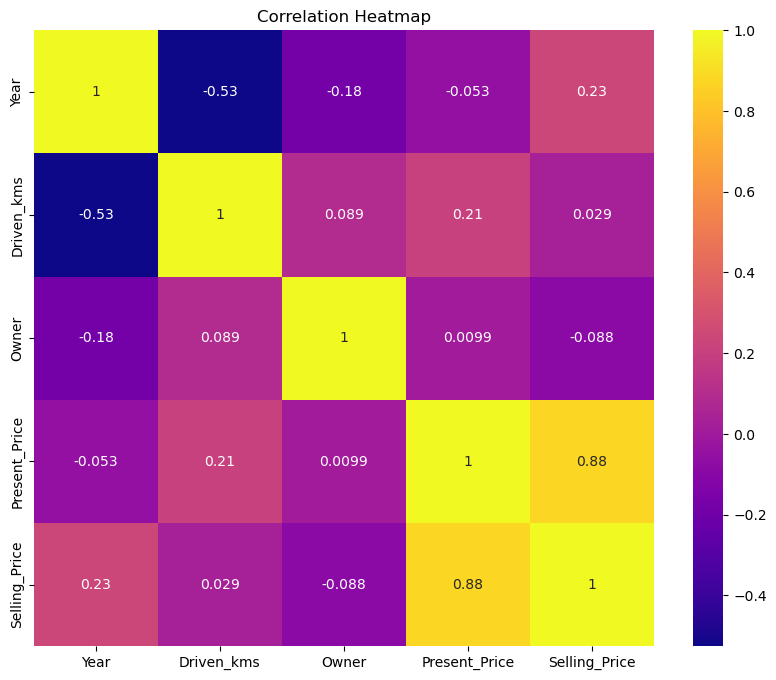

In [17]:
correlation_matrix = car_data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

categorical_columns = ['Fuel_Type','Selling_type','Transmission']
numerical_columns = ['Year','Driven_kms','Owner','Present_Price','Selling_Price']

# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    car_data[column] = label_encoder.fit_transform(car_data[column])



# Feature scaling
scaler = StandardScaler()
car_data[numerical_columns] = scaler.fit_transform(car_data[numerical_columns])

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Assuming 'car_data' is your DataFrame containing the car data
# Drop irrelevant columns
car_data = car_data.drop(['Car_Name'], axis=1)

# Separate features and target variable
X = car_data.drop('Selling_Price', axis=1)
y = car_data['Selling_Price']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Handle missing values and encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing steps
X_encoded = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2_square = r2_score(y_test, y_pred)
print(f"R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')


R-squared: 0.7409934356413546
Mean Squared Error: 0.2696107791585126


In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
283,0.884336,0.592961,0.291376
267,0.755716,0.606586,0.149130
166,-0.831937,-0.648881,-0.183056
9,0.574845,0.451884,0.122960
78,0.132713,1.341406,-1.208693
280,0.132713,-0.009308,0.142022
95,0.253295,0.802697,-0.549402
111,-0.691259,-0.579205,-0.112053
5,0.936588,0.815061,0.121527
175,-0.846005,-1.111605,0.265601
